In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import os 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

## Problem Statement

By using data we easily monitor and analyze how customers are finding and buying products. Use these insights to optimize
campaign with minimal effort.

Dealing sales data .....for getting best months,date,day and time for sales... product..

We also deals which product demand more in which city.

### Data gathering

In [3]:
x=['1.Sales_January_2019.csv',
 '2.Sales_February_2019.csv',
 '3.Sales_March_2019.csv',
 '4.Sales_April_2019.csv',
 '5.Sales_May_2019.csv',
 '6.Sales_June_2019.csv',
 '7.Sales_July_2019.csv',
 '8.Sales_August_2019.csv',
 '9.Sales_September_2019.csv',
 '10.Sales_October_2019.csv',
 '11.Sales_November_2019.csv',
 '12.Sales_December_2019.csv',]

##### marging different months sale file in single way

In [4]:
data=pd.DataFrame()

for i in x:
    df=pd.read_csv(i)
    data=pd.concat([data,df],ignore_index=True)

In [5]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


##### Data  preprocessing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
data.axes

[RangeIndex(start=0, stop=186850, step=1),
 Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
        'Purchase Address'],
       dtype='object')]

In [8]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
data = data.loc[~(data["Order ID"].isnull()==True)]

In [10]:
data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [12]:
data["Price Each"].astype(float)

ValueError: could not convert string to float: 'Price Each'

In [13]:
#we gitting some error due to some string ("Price Each") present in Price Each columns

In [14]:
data["Price Each"]

0            700
1          14.95
2          11.99
3         149.99
4          11.99
           ...  
186845     14.95
186846      3.84
186847       400
186848     11.99
186849     99.99
Name: Price Each, Length: 186305, dtype: object

In [15]:
data.loc[data["Price Each"]=='Price Each']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184931,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185070,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185481,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185925,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [29]:
data=data.loc[~(data["Price Each"]=="Price Each")]

In [30]:
data["Price Each"] = data["Price Each"].astype(float)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int32         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   sale              185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(2)
memory usage: 9.9+ MB


In [26]:
data.reset_index()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...,...
185945,186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
185946,186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
185947,186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
185948,186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


In [32]:
data["Quantity Ordered"] = data["Quantity Ordered"].astype("int")

In [33]:
data["Order ID"] = data["Order ID"].astype("int")

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int32         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   sale              185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(2)
memory usage: 9.9+ MB


In [37]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sale
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99
...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99


##### creating new sale colummns

In [38]:
data["sale"]=data["Price Each"]*data["Quantity Ordered"]

In [34]:
import datetime

##### By using time date module ..we find ..sales months,date,day and time

In [40]:
data["Order Date"]= pd.to_datetime(data["Order Date"])

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int32         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   sale              185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(2)
memory usage: 9.9+ MB


###### Months

In [42]:
data["month"] = data["Order Date"].dt.month

###### Day

In [43]:
data["day"] = data["Order Date"].dt.day

In [44]:
data.groupby("month")["sale"].sum()

month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sale, dtype: float64

###### Total sale in each months

In [45]:
data_sale = pd.DataFrame(data.groupby("month")[["sale","Quantity Ordered"]].sum())

In [46]:
data_sale

,sale,Quantity Ordered
month,,
1,1822256.73,10903
2,2202022.42,13449
3,2807100.38,17005
4,3390670.24,20558
5,3152606.75,18667
6,2577802.26,15253
7,2647775.76,16072
8,2244467.88,13448
9,2097560.13,13109


In [49]:
data_sale.reset_index(inplace = True)
data_sale

,index,month,sale,Quantity Ordered
0,0,1,1822256.73,10903
1,1,2,2202022.42,13449
2,2,3,2807100.38,17005
3,3,4,3390670.24,20558
4,4,5,3152606.75,18667
5,5,6,2577802.26,15253
6,6,7,2647775.76,16072
7,7,8,2244467.88,13448
8,8,9,2097560.13,13109
9,9,10,3736726.88,22703


In [50]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sale,month,day
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,1,22
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,1,28
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,1,17
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,1,5
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,1,25
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,12,11
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,12,1
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,12,9
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,12,3


###### total sale in each months

Text(0.5, 0, 'months')

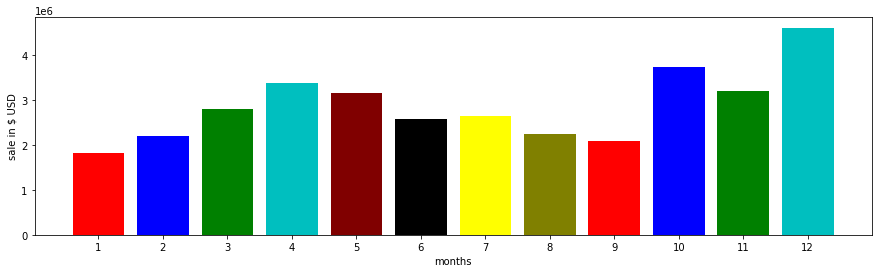

In [60]:
plt.figure(figsize = (15,4))
c=["r","b","g","c","maroon","black","yellow","olive","r","b","g","c"]

x = range(1,13)
y = data_sale["sale"]
plt.bar(x,y,color= c)

plt.xticks(x)
plt.ylabel("sale in $ USD")
plt.xlabel("months")

In [ ]:
# with Quantity Ordered

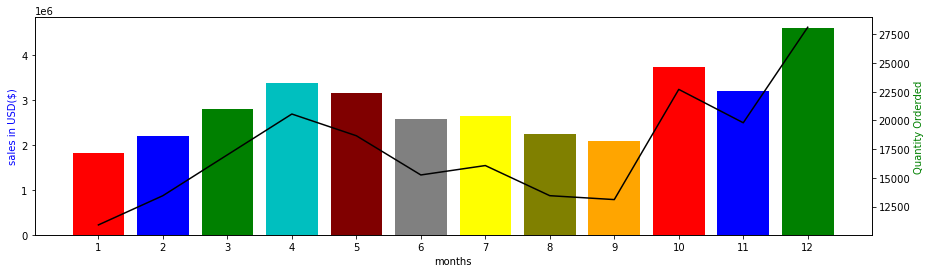

In [58]:
fig, ax1 = plt.subplots(figsize=(15,4))
c=["r","b","g","c","maroon","grey","yellow","olive","orange"]
ax2 = ax1.twinx()
ax1.bar(x,y,color=c)
ax2.plot(x,data_sale["Quantity Ordered"], color="k")
plt.xticks(x)
ax1.set_xlabel('months')
ax1.set_ylabel('sales in USD($)', color='b')
ax2.set_ylabel('Quantity Orderded', color="g")
plt.show()

###### Hour

In [61]:
data["Hour"]= data["Order Date"].dt.hour

In [62]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sale,month,day,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,1,22,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,1,28,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,1,17,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,1,5,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,1,25,11
...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,12,11,20
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,12,1,12
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,12,9,6
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,12,3,10


###### Day_name

In [63]:
data["day_name"] = data["Order Date"].dt.day_name()

In [64]:
data.head(60)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sale,month,day,Hour,day_name
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,1,22,21,Tuesday
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,1,28,14,Monday
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,1,17,13,Thursday
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,1,5,20,Saturday
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,1,25,11,Friday
5,141239,AAA Batteries (4-pack),1,2.99,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016",2.99,1,29,20,Tuesday
6,141240,27in 4K Gaming Monitor,1,389.99,2019-01-26 12:16:00,"979 Park St, Los Angeles, CA 90001",389.99,1,26,12,Saturday
7,141241,USB-C Charging Cable,1,11.95,2019-01-05 12:04:00,"181 6th St, San Francisco, CA 94016",11.95,1,5,12,Saturday
8,141242,Bose SoundSport Headphones,1,99.99,2019-01-01 10:30:00,"867 Willow St, Los Angeles, CA 90001",99.99,1,1,10,Tuesday
9,141243,Apple Airpods Headphones,1,150.00,2019-01-22 21:20:00,"657 Johnson St, San Francisco, CA 94016",150.00,1,22,21,Tuesday


###### sales record in days

In [71]:
peak_day = data.groupby("day")[["sale","Quantity Ordered"]].sum()

In [72]:
peak_day =pd.DataFrame(peak_day)

In [73]:
peak_day.reset_index(inplace = True)

In [68]:
peak_day

,day,sale,Quantity Ordered
0,1,1166319.25,6867
1,2,1137457.04,6962
2,3,1074432.90,6534
3,4,1163857.72,6813
4,5,1135284.73,6816
5,6,1151956.09,6778
6,7,1094796.63,6779
7,8,1107963.49,6824
8,9,1169250.43,6836
9,10,1169108.73,6965


###### Day having maximum sales

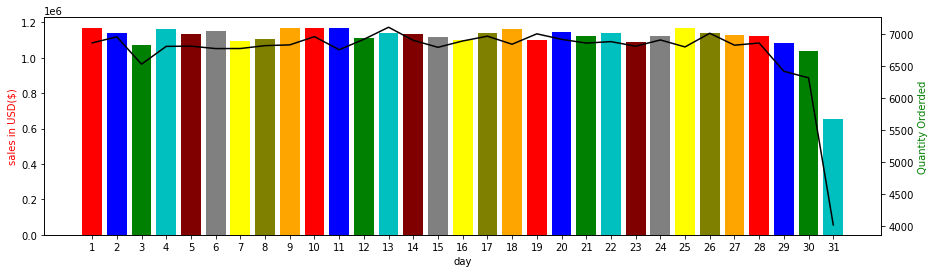

In [74]:
fig,ax1 = plt.subplots(figsize=(15,4))
x=peak_day["day"]
y=peak_day["sale"]
c=["r","b","g","c","maroon","grey","yellow","olive","orange"]
ax2 = ax1.twinx()
ax1.bar(x,y,color=c)
ax2.plot(x,peak_day["Quantity Ordered"], color="k")
plt.xticks(x)
ax1.set_xlabel('day')
ax1.set_ylabel('sales in USD($)', color='r')
ax2.set_ylabel('Quantity Orderded', color="g")
plt.show()

In [76]:
peak_hour = data.groupby("Hour")[["sale","Quantity Ordered"]].sum()

In [77]:
peak_hour = pd.DataFrame(peak_hour)

In [78]:
peak_hour.reset_index(inplace = True)

In [79]:
peak_hour

,Hour,sale,Quantity Ordered
0,0,713721.27,4428
1,1,460866.88,2619
2,2,234851.44,1398
3,3,145757.89,928
4,4,162661.01,937
5,5,230679.82,1493
6,6,448113.00,2810
7,7,744854.12,4556
8,8,1192348.97,7002
9,9,1639030.58,9816


###### time having maximum sales

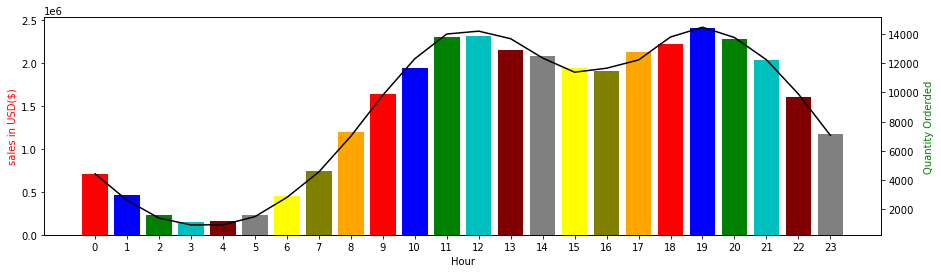

In [80]:
fig, ax1 = plt.subplots(figsize=(15,4))
x=peak_hour["Hour"]
y=peak_hour["sale"]
c=["r","b","g","c","maroon","grey","yellow","olive","orange"]
ax2 = ax1.twinx()
ax1.bar(x,y,color=c)
ax2.plot(x,peak_hour["Quantity Ordered"], color="k")
plt.xticks(x)
ax1.set_xlabel('Hour')
ax1.set_ylabel('sales in USD($)', color='r')
ax2.set_ylabel('Quantity Orderded', color="g")
plt.show()

In [81]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sale,month,day,Hour,day_name
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,1,22,21,Tuesday
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,1,28,14,Monday
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,1,17,13,Thursday
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,1,5,20,Saturday
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,1,25,11,Friday
...,...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,12,11,20,Wednesday
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,12,1,12,Sunday
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,12,9,6,Monday
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,12,3,10,Tuesday


In [82]:
peak_day= data.groupby("day_name")[["sale","Quantity Ordered"]].sum()

In [83]:
peak_day =pd.DataFrame(peak_day)

In [85]:
peak_day

,sale,Quantity Ordered
day_name,,
Friday,4855938.38,29448
Monday,4883326.72,29899
Saturday,4904357.01,29769
Sunday,4932169.66,29778
Thursday,4839465.16,29662
Tuesday,5087956.78,30724
Wednesday,4988822.26,29799


In [86]:
peak_day.reset_index(inplace = True)

In [87]:
peak_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   day_name          7 non-null      object 
 1   sale              7 non-null      float64
 2   Quantity Ordered  7 non-null      int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 268.0+ bytes


###### Day having maximum Sales

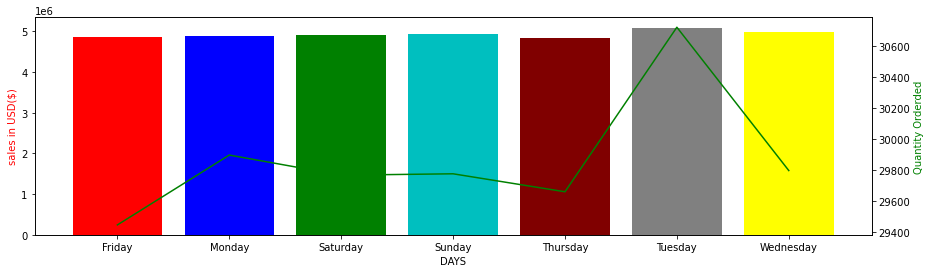

In [88]:
fig, ax1 = plt.subplots(figsize=(15,4))
x=peak_day["day_name"]
y=peak_day["sale"]
ax2 = ax1.twinx()
c=["r","b","g","c","maroon","grey","yellow","olive","orange"]
ax1.bar(x,y,color=c)
ax2.plot(x,peak_day["Quantity Ordered"], color="g")
plt.xticks(x)
ax1.set_xlabel('DAYS')
ax1.set_ylabel('sales in USD($)', color='r')
ax2.set_ylabel('Quantity Orderded', color="g")
plt.show()

In [89]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sale,month,day,Hour,day_name
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,1,22,21,Tuesday
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,1,28,14,Monday
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,1,17,13,Thursday
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,1,5,20,Saturday
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,1,25,11,Friday


In [102]:
data["City"]=data["Purchase Address"].apply(lambda x : x.split(",")[1][1:] + " " + "({})".format(x.split(",")[2][1:3]))

In [103]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sale,month,day,Hour,day_name,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,1,22,21,Tuesday,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,1,28,14,Monday,Portland (OR)
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,1,17,13,Thursday,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,1,5,20,Saturday,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,1,25,11,Friday,Austin (TX)
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,12,11,20,Wednesday,San Francisco (CA)
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,12,1,12,Sunday,Los Angeles (CA)
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,12,9,6,Monday,Seattle (WA)
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,12,3,10,Tuesday,Dallas (TX)


###### City_sales

In [104]:
city_sale = pd.DataFrame(data.groupby("City")[["sale","Quantity Ordered"]].sum())

In [105]:
city_sale

,sale,Quantity Ordered
City,,
Atlanta (GA),2795498.58,16602
Austin (TX),1819581.75,11153
Boston (MA),3661642.01,22528
Dallas (TX),2767975.40,16730
Los Angeles (CA),5452570.80,33289
New York City (NY),4664317.43,27932
Portland (ME),449758.27,2750
Portland (OR),1870732.34,11303
San Francisco (CA),8262203.91,50239


In [108]:
city_sale.reset_index(inplace = True)
city_sale

,index,City,sale,Quantity Ordered
0,0,Atlanta (GA),2795498.58,16602
1,1,Austin (TX),1819581.75,11153
2,2,Boston (MA),3661642.01,22528
3,3,Dallas (TX),2767975.40,16730
4,4,Los Angeles (CA),5452570.80,33289
5,5,New York City (NY),4664317.43,27932
6,6,Portland (ME),449758.27,2750
7,7,Portland (OR),1870732.34,11303
8,8,San Francisco (CA),8262203.91,50239
9,9,Seattle (WA),2747755.48,16553


##### Compearing city sale

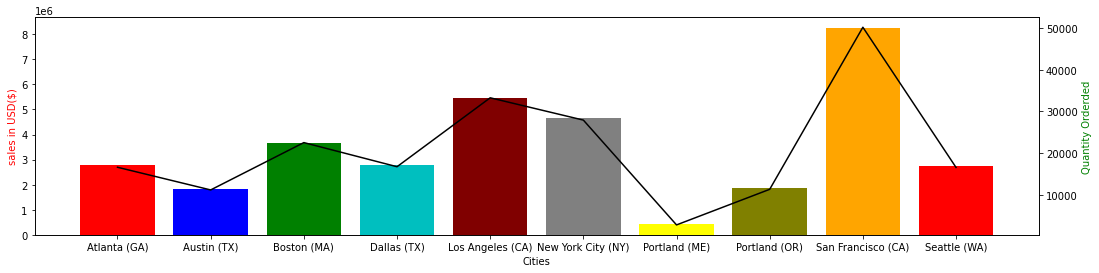

In [112]:
fig, ax1 = plt.subplots(figsize=(18,4))
c=["r","b","g","c","maroon","grey","yellow","olive","orange"]
x=city_sale["City"]
y=city_sale["sale"]
ax2 = ax1.twinx()
ax1.bar(x,y,color=c)
ax2.plot(x,city_sale["Quantity Ordered"], color="k")
plt.xticks(x,rotation="vertical")
ax1.set_xlabel('Cities')
ax1.set_ylabel('sales in USD($)', color='r')
ax2.set_ylabel('Quantity Orderded', color="g")
plt.show()

In [113]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sale,month,day,Hour,day_name,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,1,22,21,Tuesday,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,1,28,14,Monday,Portland (OR)
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,1,17,13,Thursday,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,1,5,20,Saturday,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,1,25,11,Friday,Austin (TX)


In [114]:
pd.set_option("display.max_row",None)

In [116]:
data.groupby(["City","Product"])["sale"].sum()

City                Product                   
Atlanta (GA)        20in Monitor                    37616.58
                    27in 4K Gaming Monitor         192265.07
                    27in FHD Monitor                88194.12
                    34in Ultrawide Monitor         183155.18
                    AA Batteries (4-pack)            8421.12
                    AAA Batteries (4-pack)           7053.41
                    Apple Airpods Headphones       189900.00
                    Bose SoundSport Headphones     108389.16
                    Flatscreen TV                  122100.00
                    Google Phone                   270600.00
                    LG Dryer                        35400.00
                    LG Washing Machine              31200.00
                    Lightning Charging Cable        28091.05
                    Macbook Pro Laptop             644300.00
                    ThinkPad Laptop                356996.43
                    USB-C Charging Cab

In [121]:
a = data.groupby(["City","Product"]).agg({"sale":sum})

##### product sale in city

In [140]:
a

sale
City               Product                               
Atlanta (GA)       20in Monitor                  37616.58
                   27in 4K Gaming Monitor       192265.07
                   27in FHD Monitor              88194.12
                   34in Ultrawide Monitor       183155.18
                   AA Batteries (4-pack)          8421.12
                   AAA Batteries (4-pack)         7053.41
                   Apple Airpods Headphones     189900.00
                   Bose SoundSport Headphones   108389.16
                   Flatscreen TV                122100.00
                   Google Phone                 270600.00
                   LG Dryer                      35400.00
                   LG Washing Machine            31200.00
                   Lightning Charging Cable      28091.05
                   Macbook Pro Laptop           644300.00
                   ThinkPad Laptop              356996.43
                   USB-C Charging Cable          22884.25
                   Vareebadd Phone               69200.00
                   Wired Headphones              18932.21
                   iPhone                       380800.00
Austin (TX)        20in Monitor                  25297.70
                   27in 4K Gaming Monitor       124016.82
                   27in FHD Monitor              53996.40
                   34in Ultrawide Monitor       124636.72
                   AA Batteries (4-pack)          5468.16
                   AAA Batteries (4-pack)         4987.32
                   Apple Airpods Headphones     133050.00
                   Bose SoundSport Headphones    70692.93
                   Flatscreen TV                 72600.00
                   Google Phone                 164400.00
                   LG Dryer                      33000.00
                   LG Washing Machine            15600.00
                   Lightning Charging Cable      19539.65
                   Macbook Pro Laptop           426700.00
                   ThinkPad Laptop              209997.90
                   USB-C Charging Cable          14949.45
                   Vareebadd Phone               43200.00
                   Wired Headphones              13548.70
                   iPhone                       263900.00
Boston (MA)        20in Monitor                  43336.06
                   27in 4K Gaming Monitor       263243.25
                   27in FHD Monitor             119542.03
                   34in Ultrawide Monitor       254973.29
                   AA Batteries (4-pack)         11581.44
                   AAA Batteries (4-pack)        10348.39
                   Apple Airpods Headphones     247950.00
                   Bose SoundSport Headphones   141585.84
                   Flatscreen TV                166200.00
                   Google Phone                 355800.00
                   LG Dryer                      35400.00
                   LG Washing Machine            43200.00
                   Lightning Charging Cable      37240.45
                   Macbook Pro Laptop           814300.00
                   ThinkPad Laptop              446995.53
                   USB-C Charging Cable          30603.95
                   Vareebadd Phone               85600.00
                   Wired Headphones              26641.78
                   iPhone                       527100.00
Dallas (TX)        20in Monitor                  37726.57
                   27in 4K Gaming Monitor       187585.19
                   27in FHD Monitor              88044.13
                   34in Ultrawide Monitor       194554.88
                   AA Batteries (4-pack)          8682.24
                   AAA Batteries (4-pack)         7486.96
                   Apple Airpods Headphones     179100.00
                   Bose SoundSport Headphones   106289.37
                   Flatscreen TV                126000.00
                   Google Phone                 276600.00
                   LG Dryer                      26

In [141]:
g = a["sale"].groupby("City",group_keys = False)

In [142]:
print(g)

##### top product sales in city

In [143]:
res = g.apply(lambda x : x.sort_values(ascending = False).head(5))

In [144]:
res

City                Product                 
Atlanta (GA)        Macbook Pro Laptop           644300.00
                    iPhone                       380800.00
                    ThinkPad Laptop              356996.43
                    Google Phone                 270600.00
                    27in 4K Gaming Monitor       192265.07
Austin (TX)         Macbook Pro Laptop           426700.00
                    iPhone                       263900.00
                    ThinkPad Laptop              209997.90
                    Google Phone                 164400.00
                    Apple Airpods Headphones     133050.00
Boston (MA)         Macbook Pro Laptop           814300.00
                    iPhone                       527100.00
                    ThinkPad Laptop              446995.53
                    Google Phone                 355800.00
                    27in 4K Gaming Monitor       263243.25
Dallas (TX)         Macbook Pro Laptop           649400.00
           

##### top5

In [132]:
top5_product = pd.DataFrame(res)

In [135]:
top5_product.reset_index(inplace = True)
top5_product

,City,Product,sale
0,Atlanta (GA),Macbook Pro Laptop,644300.00
1,Atlanta (GA),iPhone,380800.00
2,Atlanta (GA),ThinkPad Laptop,356996.43
3,Atlanta (GA),Google Phone,270600.00
4,Atlanta (GA),27in 4K Gaming Monitor,192265.07
5,Austin (TX),Macbook Pro Laptop,426700.00
6,Austin (TX),iPhone,263900.00
7,Austin (TX),ThinkPad Laptop,209997.90
8,Austin (TX),Google Phone,164400.00
9,Austin (TX),Apple Airpods Headphones,133050.00


#### Product sales in different City

<AxesSubplot:xlabel='City', ylabel='sale'>

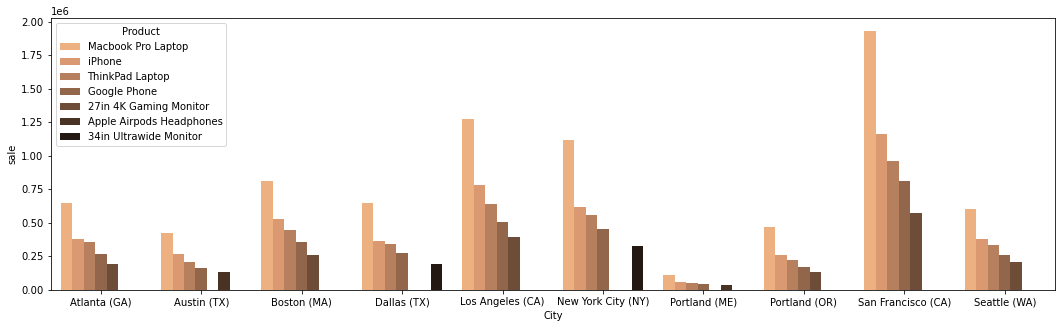

In [139]:
plt.figure(figsize=(18,5))
sns.barplot(top5_product["City"],top5_product["sale"],hue=top5_product["Product"],palette="copper_r")